## BUILDING REGRESSION MODEL & TIME SERIES ANALYSIS

### 1. IMPORTING LIBRARIES

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 2. DESIGNING LINEAR REGRESSION MODEL

##### I designed the LineModel class to perform simple linear regression between two input arrays, x and y, representing the independent and dependent variables, respectively. In the LinearRegression method, I used a formula-based approach to calculate the slope (b1) and intercept (bo) of the regression line. This method first calculates the mean of the x and y arrays, then calculates the difference between each value in the arrays and their respective means. The method then squares the differences of the x values and calculates the product of the differences of x and y values. Using these values, the slope and intercept of the regression line are calculated using the formula

##### b1 = (sum of x * y differences) / (sum of x squared differences)
##### bo = y mean - (b1 * x mean).

##### The slope and intercept are then returned as a tuple.

In [2]:
class LineModel:
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def LinearRegression(self, x, y):
        x_mean = sum(x)/len(x)
        y_mean = sum(y)/len(y)
        x_value = [value - x_mean for value in x]
        y_value = [value - y_mean for value in y]
        x_value_square = [x**2 for x in x_value]
        x_value_square_total = sum(x_value_square)
        x_y_value_square = [x*y for x,y in zip(x_value,y_value)]
        x_y_value_square_total = sum(x_y_value_square)
        b1 = x_y_value_square_total/x_value_square_total
        bo = y_mean - (b1*x_mean)
        return (b1, bo)

### 3. INHERITANCE

##### Inheritance is a mechanism in object-oriented programming (OOP) that allows you to create a new class that is a modified version of an existing class. The new class is called a derived class or subclass, and the existing class is the base class or superclass.

##### Inheritance allows you to reuse the code and functionality of the base class in the derived class, without having to rewrite the code. The derived class can also add new attributes and methods, or override the existing ones. 

##### In the code example, the Plot class is a derived class that inherits from the LineModel class. The Plot class has access to all the attributes and methods of the LineModel class, including the LinearRegression method. This means that you can call the LinearRegression method from an instance of the Plot class, without having to write the code for the method again.

##### The Plot class also adds a new method, line_plot, which creates a line plot of the data using the matplotlib library. This method is specific to the Plot class and is not part of the LineModel class.

##### By using inheritance, the code for the LinearRegression method is reused in the Plot class, making the code more flexible and maintainable.

In [3]:
class Plot(LineModel):
    def __init__(self, x, y):
        LineModel.__init__(self, x, y)

    def ScatterPlot(self, x, y_pred):
        from matplotlib.ticker import FuncFormatter
        import seaborn as sns
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.scatterplot(x=self.x, y=self.y, color="red")
        plt.plot(x, y_pred, color="white", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'))
        ax.grid(color='white', alpha=0.20)
        plt.show()

### 4. CLASS STOCK

In [4]:
class Stock:

    def __init__(self, ticker):
        self.ticker = ticker

    def price(self, ticker):
        stock = yf.Ticker(ticker.upper())
        history = stock.history(period="max")
        return history

## FIRST CASE

#### 200 DAYS CHART

In [5]:
RELIANCE = Stock("RELIANCE.NS").price("RELIANCE.NS").tail(200)

In [6]:
RELIANCE.shape

(200, 7)

In [7]:
RELIANCE.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [8]:
RELIANCE[:10]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-15 00:00:00+05:30,2609.693051,2629.383768,2576.642410,2588.506836,5166738,0.0,0.0
2022-06-16 00:00:00+05:30,2615.126567,2651.068405,2546.333684,2552.315674,7896943,0.0,0.0
2022-06-17 00:00:00+05:30,2552.315637,2616.971074,2548.427441,2582.225586,11286988,0.0,0.0
2022-06-20 00:00:00+05:30,2597.180498,2609.244275,2513.532441,2535.416504,5568825,0.0,0.0
2022-06-21 00:00:00+05:30,2552.315749,2585.615396,2520.710950,2576.343506,5408801,0.0,0.0
2022-06-22 00:00:00+05:30,2550.421514,2550.620865,2493.492812,2498.079102,4899839,0.0,0.0
2022-06-23 00:00:00+05:30,2507.500740,2517.420825,2437.660957,2457.551025,8974475,0.0,0.0
2022-06-24 00:00:00+05:30,2472.555790,2503.462737,2460.591810,2492.545654,6571866,0.0,0.0
2022-06-27 00:00:00+05:30,2537.310785,2537.310785,2474.101189,2485.167725,7141493,0.0,0.0


### Converting a series of date strings stored in the index of a pandas dataframe called RELIANCE into ordinal numbers.

#### The datetime.toordinal function is used to convert each date in the index to an ordinal number, which is a unique integer assigned to each day in the proleptic Gregorian calendar. The resulting ordinal numbers are stored in a new column in the RELIANCE dataframe called Date.

In [9]:
RELIANCE['Date'] = [datetime.toordinal(d) for d in RELIANCE.index]

In [10]:
x = RELIANCE['Date'].values

In [11]:
y = RELIANCE.Close.values

### TRAINING MODEL

In [12]:
b1, bo = LineModel(x,y).LinearRegression(x,y)

#### Creating an instance of the LineModel class, passing x and y as arguments. The LinearRegression method of the LineModel class is then called on the instance, passing x and y as arguments. The result of the LinearRegression method is a tuple of two values, b1 and bo, which are unpacked and assigned to the corresponding variables.

### PREDICTIONS

In [13]:
# Make predictions for all x values
y_pred = [bo + b1 * xi for xi in x]

In [14]:
print(f"The predicted values of y are: \n\n{y_pred}")

The predicted values of y are: 

[2569.2640688358224, 2568.667564189236, 2568.0710595425917, 2566.2815456027165, 2565.6850409561303, 2565.088536309486, 2564.4920316628995, 2563.895527016255, 2562.10601307638, 2561.5095084297936, 2560.913003783149, 2560.316499136563, 2559.7199944899185, 2557.9304805500433, 2557.333975903457, 2556.7374712568126, 2556.140966610168, 2555.544461963582, 2553.7549480237067, 2553.1584433771204, 2552.561938730476, 2551.9654340838315, 2551.3689294372452, 2549.57941549737, 2548.9829108507256, 2548.3864062041393, 2547.789901557495, 2547.1933969109086, 2545.4038829710335, 2544.807378324389, 2544.2108736778027, 2543.6143690311583, 2543.017864384572, 2541.228350444697, 2540.6318457980524, 2540.035341151466, 2539.4388365048217, 2538.8423318582354, 2537.0528179183602, 2535.8598086251295, 2535.263303978485, 2534.6667993318406, 2532.280780745379, 2531.684276098793, 2531.0877714521484, 2530.491266805504, 2528.701752865687, 2528.1052482190426, 2527.508743572398, 2526.91223

In [15]:
# Convert ordinal value back to date
x = [datetime.fromordinal(int(d)) for d in x.flatten()]

### PLOTTING 200 DATA POINTS AND BEST FIT LINE 

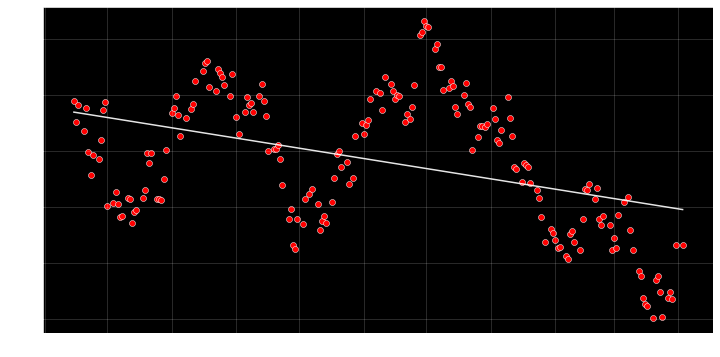

In [16]:
obj = Plot(x, y)
obj.ScatterPlot(x, y_pred)

## SECOND CASE

### RELIANCE TWO YEAR CHART

In [17]:
days = 365*2

In [18]:
RELIANCE = Stock("RELIANCE.NS").price("RELIANCE.NS").tail(days)

In [19]:
RELIANCE.shape

(730, 7)

In [20]:
RELIANCE['Date'] = [datetime.toordinal(d) for d in RELIANCE.index]

In [21]:
x = RELIANCE['Date'].values

In [22]:
y = RELIANCE.Close.values

## TRAINING MODEL

In [23]:
b1, bo = LineModel(x,y).LinearRegression(x,y)

### PREDICTIONS

In [24]:
# Make predictions for all x values
y_pred = [bo + b1 * xi for xi in x]

In [25]:
print(f"The predicted values of y are: \n\n{y_pred}")

The predicted values of y are: 

[1846.0142269659555, 1849.1004013338825, 1849.8719449258642, 1850.643488517846, 1851.4150321098277, 1852.1865757018095, 1854.5012064777547, 1855.2727500697365, 1856.0442936617183, 1856.8158372537, 1857.5873808456818, 1859.902011621627, 1860.6735552136088, 1861.4450988055905, 1862.2166423975723, 1862.988185989554, 1866.0743603575975, 1866.8459039495792, 1867.617447541561, 1868.3889911335427, 1870.703621909488, 1871.4751655014697, 1872.2467090934515, 1873.0182526854333, 1873.789796277415, 1876.1044270533603, 1876.875970645342, 1877.6475142373238, 1878.4190578293055, 1879.1906014212873, 1881.5052321972325, 1882.2767757892143, 1883.048319381196, 1883.8198629731778, 1884.5914065651596, 1886.9060373411048, 1887.6775809330866, 1888.4491245250683, 1889.22066811705, 1889.9922117090318, 1892.306842484977, 1893.0783860769589, 1893.8499296689406, 1894.6214732609224, 1895.393016852904, 1897.7076476288494, 1898.4791912208311, 1899.2507348128129, 1900.0222784047946, 1

In [26]:
# Convert ordinal value back to date
x = [datetime.fromordinal(int(d)) for d in x.flatten()]

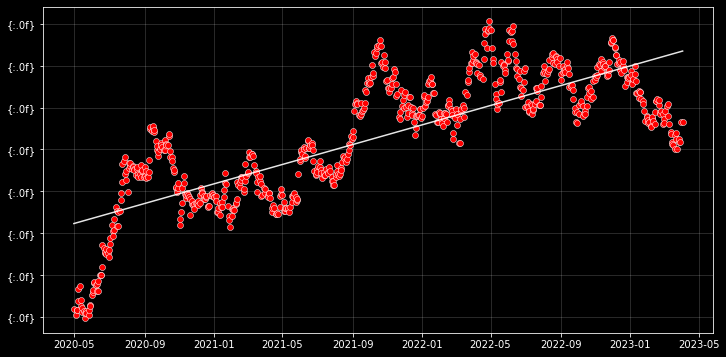

In [27]:
obj2 = Plot(x, y)
obj2.ScatterPlot(x, y_pred)

## THIRD CASE

#### ^NSEI & RELIANCE

##### A scatter plot can be used to visualize the relationship between two variables. For example, you could create a scatter plot of the ^NSEI index on the x-axis and the stock price of RELIANCE on the y-axis. This would allow you to visualize how the ^NSEI index affects the stock price of RELIANCE.

In [28]:
days = 365*2

In [29]:
RELIANCE = Stock("RELIANCE.NS").price("RELIANCE.NS").Close.tail(days)

In [30]:
NSEI = Stock("^NSEI").price("^NSEI").Close.tail(days)

In [31]:
x = NSEI.values

In [32]:
y = RELIANCE.values

#### TRIANING MODEL

In [33]:
b1, bo = LineModel(x,y).LinearRegression(x,y)

#### PREDICTIONS

In [34]:
# Make predictions for all x values
y_pred = [bo + b1 * xi for xi in x]

In [35]:
print(f"The predicted values of y are: \n\n{y_pred}")

The predicted values of y are: 

[1688.9177251238818, 1718.2832483039567, 1664.0258631742233, 1655.6055911791211, 1661.8609711121119, 1654.978163512516, 1660.0025428990834, 1658.8243035281434, 1654.738680162805, 1672.6520347211667, 1649.5850171866673, 1649.0197990620763, 1618.9790450936375, 1624.3290657069015, 1642.285545977848, 1646.0885602808908, 1639.6704065086435, 1638.693295732187, 1666.080649024378, 1682.8587963762006, 1691.4993743434002, 1715.050223082862, 1729.701739579617, 1737.599919162713, 1734.4914065738312, 1745.3209184862967, 1747.7444712757324, 1736.1726545273473, 1742.830291649305, 1722.3161104938117, 1729.1078957108812, 1713.857577291666, 1723.4656305724232, 1720.3188567764978, 1740.48335482214, 1755.1157874894648, 1761.5147638840986, 1776.8225208879708, 1760.9495457595078, 1759.3785911143157, 1768.3927069781535, 1761.6297346015963, 1760.6429883622413, 1772.8997649100725, 1784.5530621262694, 1789.88390536192, 1804.8564792243808, 1808.305039460215, 1799.310007425807, 18

In [36]:
#COEFFICIENT
b1

0.09579333988428661

In [37]:
#INTERCEPT
bo

773.7704589596058

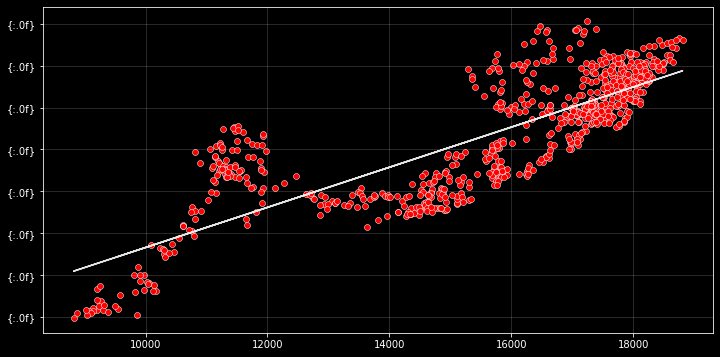

In [38]:
obj3 = Plot(x, y)
obj3.ScatterPlot(x, y_pred)

## VALIDATION USING SKLEARN

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
days = 2*365

In [41]:
RELIANCE = Stock("RELIANCE.NS").price("RELIANCE.NS").Close.tail(days)
NSEI = Stock("RELIANCE.NS").price("^NSEI").Close.tail(days)

In [42]:
X = NSEI.values.reshape(-1,1)
y = RELIANCE.values.reshape(-1,1)

#### SPLITING DATASET FOR TRAINING AND TESTING

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### CHECKING SHAPE OF TRAIN AND TEST

In [44]:
X_train.shape, y_train.shape

((584, 1), (584, 1))

In [45]:
X_test.shape,y_test.shape

((146, 1), (146, 1))

#### TRAINING MODEL

In [46]:
Model = LinearRegression()

In [47]:
Model.fit(X_train, y_train)

LinearRegression()

##### The coefficient of a feature in a linear regression model is positive, it means that there is a positive relationship between the feature and the target variable. This means that as the value of the feature increases, the value of the target variable is also likely to increase.

In [48]:
#COEFFICIENT
Model.coef_

array([[0.09534524]])

##### The coefficient of the NSEI index in a linear regression model that predicts the stock price of RELIANCE is positive, it means that as the NSEI index goes up, the stock price of RELIANCE is also likely to go up.

In [49]:
#INTERCEPT
Model.intercept_

array([780.05590416])

In [50]:
y_pred = Model.predict(X_test)

In [51]:
y_pred.shape

(146, 1)

In [52]:
y_pred[145:]

array([[2508.41247225]])

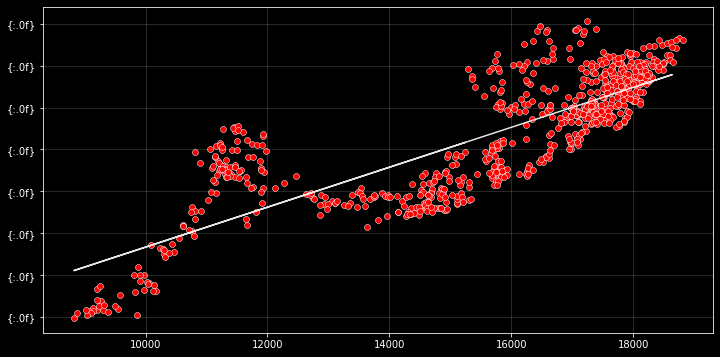

In [53]:
obj4 = Plot(X.flatten(), y.flatten())
obj4.ScatterPlot(X_test.flatten(), y_pred.flatten())